In [1]:
# import RDKit ----------------------------------------------------------------
from rdkit import Chem
from rdkit.Chem import Draw

# define the smiles string and covert it into a molecule sturcture ------------
caffeine_smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'
test_smiles = 'C-C=C-C=C'

#mol = Chem.MolFromSmiles(caffeine_smiles)
mol = Chem.MolFromSmiles(test_smiles)

# draw the modecule -----------------------------------------------------------
#Draw.MolToFile(mol, 'caffeine.png')
Draw.MolToFile(mol, 'test.png')
for bond in mol.GetBonds():
    print(bond.GetBeginAtomIdx(),',',
          bond.GetEndAtomIdx(),',',
          bond.GetBondType())

# draw the molecule with property ---------------------------------------------
for i, atom in enumerate(mol.GetAtoms()):
    atom.SetProp("molAtomMapNumber", str(atom.GetIdx()))
    
Draw.MolToFile(mol, 'test_with_prop.png')

0 , 1 , SINGLE
1 , 2 , DOUBLE
2 , 3 , SINGLE
3 , 4 , DOUBLE


[[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0.]]


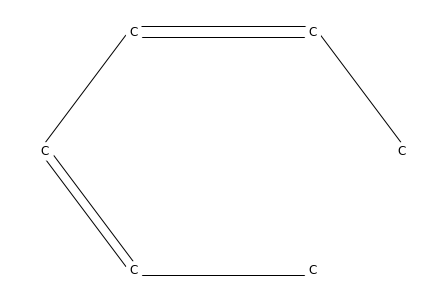

In [2]:
# import library --------------------------------------------------------------
from rdkit import Chem
import networkx as nx
import matplotlib.pyplot as plt

# define the smiles string and covert it into a molecule sturcture ------------
#caffeine_smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'
smiles = 'C-C=C-C=C-C'
mol = Chem.MolFromSmiles(smiles)

# define the function for coverting rdkit object to networkx object -----------     
def mol_to_nx(mol):
    G = nx.DiGraph()

    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(),
                   atomic_num=atom.GetAtomicNum(),
                   is_aromatic=atom.GetIsAromatic(),
                   atom_symbol=atom.GetSymbol())
        
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=bond.GetBondType())
        if (bond.GetBondType() == Chem.BondType.DOUBLE):
            G.add_edge(bond.GetEndAtomIdx(),
                        bond.GetBeginAtomIdx(),
                        bond_type=bond.GetBondType())
        
    return G

# conver rdkit object to networkx object --------------------------------------
molecule_nx = mol_to_nx(mol)

molecule_atom = nx.get_node_attributes(molecule_nx, 'atom_symbol')
    
nx.draw_circular(molecule_nx,
        labels=molecule_atom,
        with_labels = True,
        node_color='white',
        connectionstyle='bar, fraction=0.03', 
        arrowstyle = '-') #draw_circular is not ideal, straight line or zigzag would me more appropriate

#plt.show()

# print out the adjacency matrix ---------------------------------------------- 
matrix = nx.to_numpy_matrix(molecule_nx)
print(matrix)

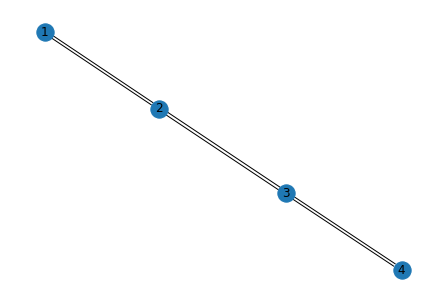

In [3]:
import networkx as nx
  
G = nx.DiGraph() #directed graph
G.add_edge(1,2)
G.add_edge(2,1)
G.add_edge(2,3)
G.add_edge(3,2)
G.add_edge(3,4)
G.add_edge(4,3)
#use bar connectionstyle and replace arrows to allow double edges and make graph look undirected
nx.draw(G, with_labels=True, connectionstyle='bar, fraction=0.01', arrowstyle = '-')